In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

Load the Dataset

In [190]:
df = pd.read_csv(".\Almond.csv")


In [191]:
df.head()


,index,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253449,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [192]:
print(df.columns)


Index(['index', 'Length (major axis)', 'Width (minor axis)',
       'Thickness (depth)', 'Area', 'Perimeter', 'Roundness', 'Solidity',
       'Compactness', 'Aspect Ratio', 'Eccentricity', 'Extent',
       'Convex hull(convex area)', 'Type'],
      dtype='object')


In [196]:
df.drop(['index'], axis=1,inplace=True)
df.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,NaN,230.150742,107.253449,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [197]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Length (major axis)       1946 non-null   float64
 1   Width (minor axis)        1861 non-null   float64
 2   Thickness (depth)         1799 non-null   float64
 3   Area                      2803 non-null   float64
 4   Perimeter                 2803 non-null   float64
 5   Roundness                 1946 non-null   float64
 6   Solidity                  2803 non-null   float64
 7   Compactness               2803 non-null   float64
 8   Aspect Ratio              1004 non-null   float64
 9   Eccentricity              1004 non-null   float64
 10  Extent                    2803 non-null   float64
 11  Convex hull(convex area)  2803 non-null   float64
 12  Type                      2803 non-null   object 
dtypes: float64(12), object(1)
memory usage: 284.8+ KB
None


In [198]:
print(df.describe())


       Length (major axis)  Width (minor axis)  Thickness (depth)  \
count          1946.000000         1861.000000        1799.000000   
mean            290.609274          171.025915         109.705378   
std              62.719433           29.916529          18.940597   
min             151.335266           88.050529          59.494278   
25%             245.966293          149.453659          97.091682   
50%             279.879883          170.168365         110.280136   
75%             330.508575          190.640427         121.392773   
max             515.352478          258.569794         181.845200   

               Area    Perimeter    Roundness     Solidity  Compactness  \
count   2803.000000  2803.000000  1946.000000  2803.000000  2803.000000   
mean   26511.117374   743.863770     0.470466     0.955828     1.825233   
std    13782.561344   230.632076     0.118673     0.039596     0.794058   
min     6037.000000   311.563489     0.173748     0.718772     1.164469   
25%

In [199]:
print(df.isnull().sum())

Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64


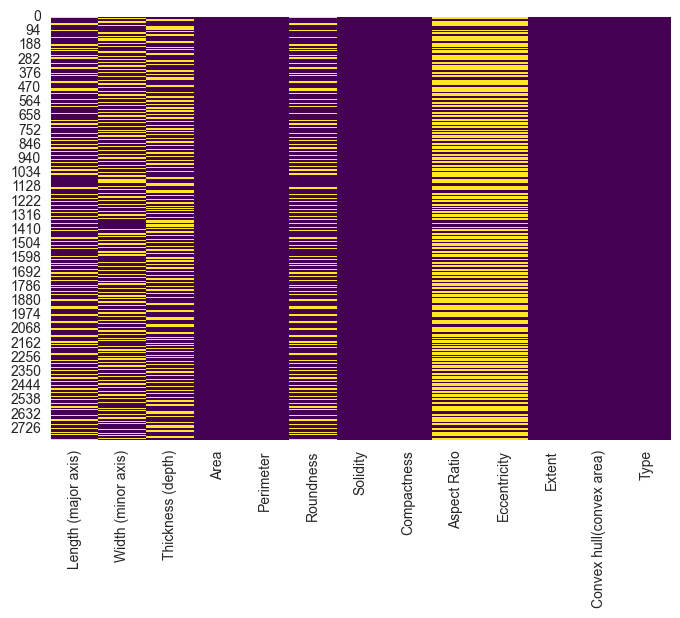

In [200]:
#Missing Values Visualization
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

#the graph below shows the index(y-axis) for each feature where value is null

Data Cleaning

In [201]:
#Handle missing values - example with mean 
df_cleaned= df.copy()
df_cleaned['Length (major axis)'] = df_cleaned['Length (major axis)'].fillna(df_cleaned['Length (major axis)'].mean())
df_cleaned.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,290.609274,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,290.609274,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,290.609274,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,290.609274,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,290.609274,230.150742,107.253449,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [242]:
df_cleaned['Width (minor axis)'] = df_cleaned['Width (minor axis)'].fillna(df_cleaned['Width (minor axis)'].mean())
df_cleaned['Thickness (depth)'] = df_cleaned['Thickness (depth)'].fillna(df_cleaned['Thickness (depth)'].mean())
df_cleaned['Roundness'] = df_cleaned['Roundness'].fillna(df_cleaned['Roundness'].mean())
df_cleaned['Aspect Ratio'] = df_cleaned['Aspect Ratio'].fillna(df_cleaned['Aspect Ratio'].mean())
df_cleaned['Eccentricity'] = df_cleaned['Eccentricity'].fillna(df_cleaned['Eccentricity'].mean())
df_cleaned.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,290.609274,227.940628,127.759132,22619.0,643.813269,0.470466,0.973384,1.458265,1.753216,0.813114,0.681193,23237.5,MAMRA
1,290.609274,234.188126,128.199509,23038.0,680.984841,0.470466,0.957304,1.601844,1.753216,0.813114,0.656353,24065.5,MAMRA
2,290.609274,229.418610,125.796547,22386.5,646.943212,0.470466,0.967270,1.487772,1.753216,0.813114,0.683620,23144.0,MAMRA
3,290.609274,232.763153,125.918808,22578.5,661.227483,0.470466,0.965512,1.540979,1.753216,0.813114,0.685360,23385.0,MAMRA
4,290.609274,230.150742,107.253449,19068.0,624.842706,0.470466,0.951450,1.629395,1.753216,0.813114,0.714800,20041.0,MAMRA


In [243]:
df

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,NaN,230.150742,107.253449,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,NaN,192.709366,122.356506,18471.5,653.345233,NaN,0.931000,1.838965,NaN,NaN,0.725739,19840.5,SANORA
2799,NaN,186.254746,118.708962,17213.5,581.688379,NaN,0.952706,1.564234,NaN,NaN,0.714016,18068.0,SANORA
2800,NaN,186.196182,119.147224,17510.5,608.315795,NaN,0.948821,1.681705,NaN,NaN,0.718999,18455.0,SANORA
2801,NaN,188.660828,120.634438,17941.0,630.759446,NaN,0.944810,1.764701,NaN,NaN,0.738191,18989.0,SANORA


Exploratory Data Analysis (EDA)

In [203]:
df_cleaned.describe()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000
mean,290.609274,171.025915,109.705378,26511.117374,743.863770,0.470466,0.955828,1.825233,1.753216,0.813114,0.724587,27696.218159
std,52.255001,24.374382,15.172405,13782.561344,230.632076,0.098873,0.039596,0.794058,0.123618,0.024717,0.047474,14237.347610
min,151.335266,88.050529,59.494278,6037.000000,311.563489,0.173748,0.718772,1.164469,1.400082,0.699897,0.454538,6355.000000
25%,264.115860,160.297798,105.398388,16211.500000,571.730009,0.422593,0.944579,1.357398,1.753216,0.813114,0.701673,17088.500000
50%,290.609274,171.025915,109.705378,23440.500000,707.487369,0.470466,0.970422,1.576412,1.753216,0.813114,0.733720,24589.000000
75%,299.851761,180.152008,115.107212,33451.000000,878.896530,0.538321,0.981484,1.965953,1.753216,0.813114,0.757551,34863.250000
max,515.352478,258.569794,181.845200,89282.000000,1864.947387,0.697293,0.992889,9.660057,2.731251,0.930563,0.845813,90642.500000


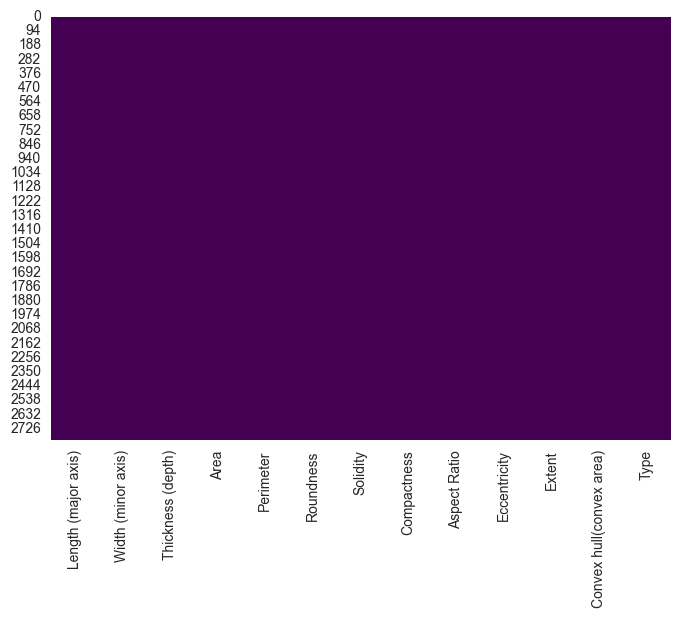

In [204]:
#Missing Values Visualization
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.show()

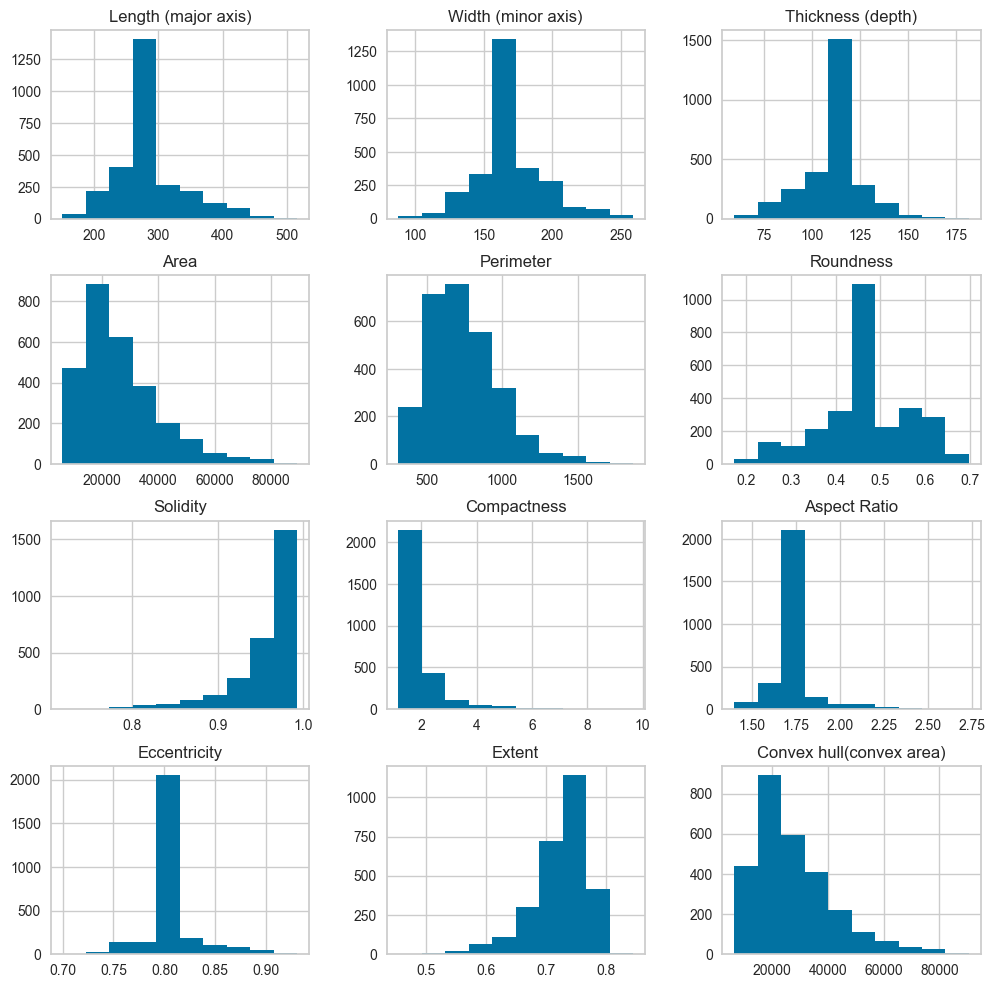

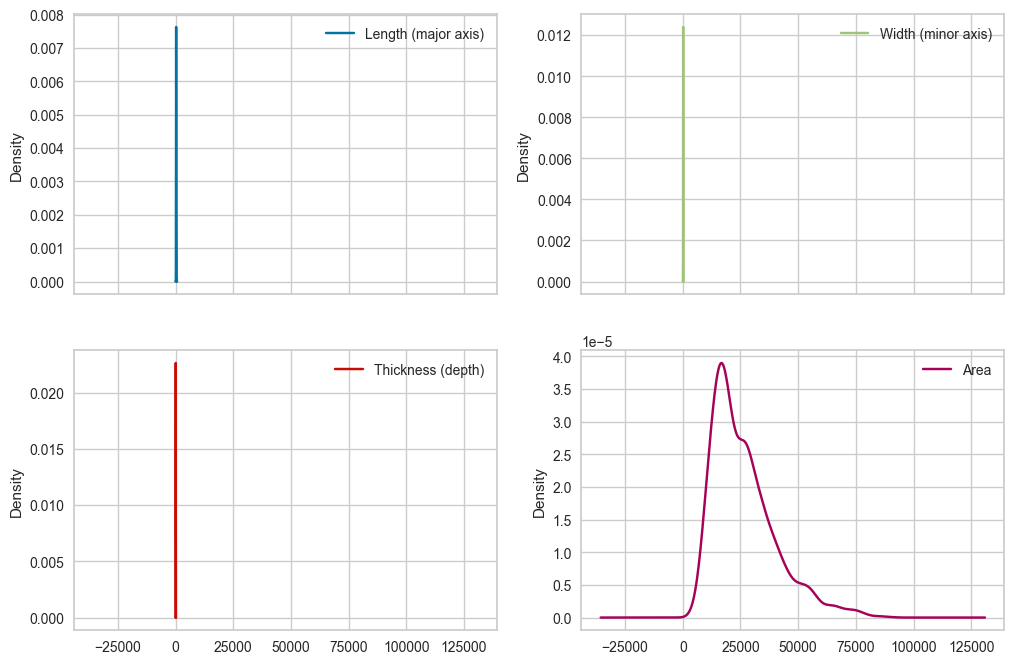

In [205]:
#Distribution Analysis
df_cleaned.hist(figsize=(12,12))
#.hist() generates histograms for every numeric column in df
plt.show()

df[['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)', 'Area']].plot(kind='kde', subplots=True, layout=(2, 2), figsize=(12, 8))
#this specifically generates KDE plots (Kernel Density Estimation - smoothed version of the histogram)for just the four columns that are listed
plt.show()


Feature Scaling
 

In [216]:
x = df_cleaned.drop(['Type'], axis = 1)
y = df_cleaned.loc[:,'Type'].values
x= StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 0.00000000e+00,  2.33543840e+00,  1.19011951e+00,
        -2.82444731e-01, -4.33887405e-01, -5.61538867e-16,
         4.43447036e-01, -4.62224847e-01,  0.00000000e+00,
        -4.49260652e-15, -9.14227870e-01, -3.13226441e-01],
       [ 0.00000000e+00,  2.59179822e+00,  1.21914951e+00,
        -2.52038572e-01, -2.72686044e-01, -5.61538867e-16,
         3.72823466e-02, -2.81376314e-01,  0.00000000e+00,
        -4.49260652e-15, -1.43754200e+00, -2.55059164e-01],
       [ 0.00000000e+00,  2.39608590e+00,  1.06074414e+00,
        -2.99316884e-01, -4.20313830e-01, -5.61538867e-16,
         2.89023903e-01, -4.25059564e-01,  0.00000000e+00,
        -4.49260652e-15, -8.63089926e-01, -3.19794847e-01],
       [ 0.00000000e+00,  2.53332590e+00,  1.06880370e+00,
        -2.85383752e-01, -3.58367463e-01, -5.61538867e-16,
         2.44615858e-01, -3.58040129e-01,  0.00000000e+00,
        -4.49260652e-15, -8.26428885e-01, -3.02864517e-01],
       [ 0.00000000e+00,  2.42612820e+00, -1.6163336

Splitting the Data

In [217]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print ('Train set:', x_train.shape, y_train.shape)
print ('Validation set:', x_test.shape,  y_test.shape)

Train set: (2242, 12) (2242,)
Validation set: (561, 12) (561,)


# Classifiers

In [218]:
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

# Random Forest Classifier

In [219]:
from sklearn.ensemble import RandomForestClassifier

In [251]:
r_forest = RandomForestClassifier()

In [257]:

r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print(f"Accuracy Score: {rf_score_: .3f}")

Accuracy Score:  0.854


Confusion Matrix

In [221]:
df['Type'].unique()

array(['MAMRA', 'SANORA', 'REGULAR'], dtype=object)

In [222]:
classes = ['MAMRA', 'SANORA', 'REGULAR']

Classiication Report

In [223]:

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       MAMRA       0.91      0.88      0.89       189
     REGULAR       0.82      0.80      0.81       187
      SANORA       0.81      0.85      0.83       185

    accuracy                           0.84       561
   macro avg       0.85      0.84      0.85       561
weighted avg       0.85      0.84      0.85       561



[[166  15   8]
 [  7 150  30]
 [  9  18 158]]


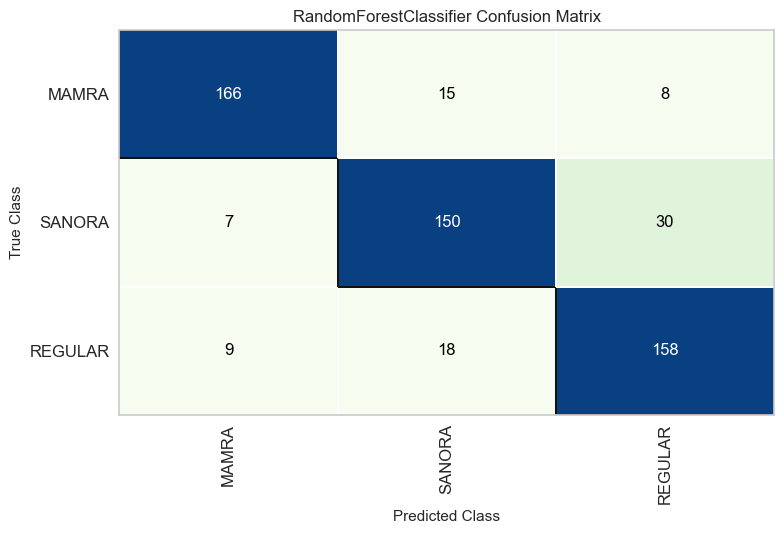

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [224]:
print(confusion_matrix(y_test, predicted))

r_forest_cm = ConfusionMatrix(r_forest, classes=classes, cmap='GnBu')

r_forest_cm.fit(x_train, y_train)
r_forest_cm.score(x_test, y_test)
r_forest_cm.show()

# Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
lr_predicted = LR.predict(x_test)
score = LR.score(x_test, y_test)
lr_score_ = np.mean(score)

print('Accuracy : %.3f' % (lr_score_))

Accuracy : 0.636


Classification Report

In [226]:

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       MAMRA       0.91      0.88      0.89       189
     REGULAR       0.82      0.80      0.81       187
      SANORA       0.81      0.85      0.83       185

    accuracy                           0.84       561
   macro avg       0.85      0.84      0.85       561
weighted avg       0.85      0.84      0.85       561



[[135  34  20]
 [ 16 108  63]
 [ 25  46 114]]


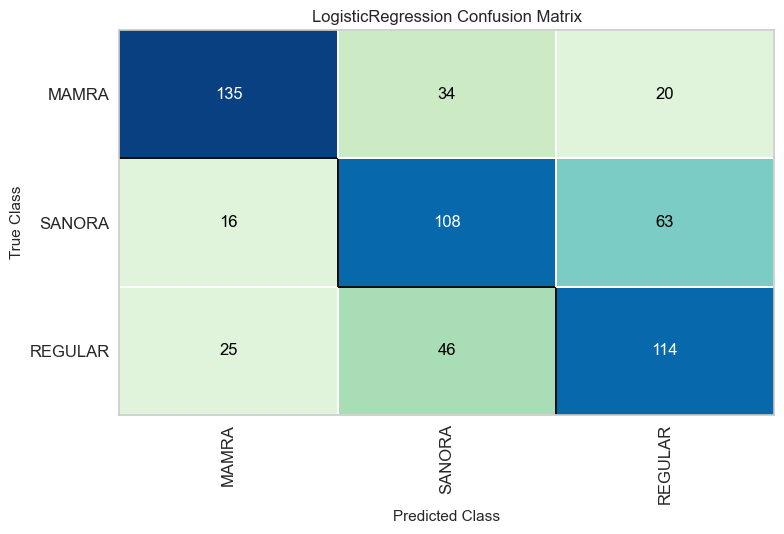

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [227]:
print(confusion_matrix(y_test, lr_predicted))

lf_cm = ConfusionMatrix(LR, classes=classes, cmap='GnBu')

lf_cm.fit(x_train, y_train)
lf_cm.score(x_test, y_test)
lf_cm.show()

# KNN-Classifier

In [228]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [230]:
# predict the values using the training data
knn_predict = knn_classifier.predict(x_test)

# Accuracy
score = knn_classifier.score(x_test, y_test)
knn_score_ = np.mean(score)
print(f"Training Accuracy: {knn_score_: .4f}")

#OR (using performance metrics library)

# from sklearn import metrics
# print(metrics.accuracy_score(y_test, knn_predict)*100)
#print("Training Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, knn_predict)*100))


Training Accuracy:  0.7825


Classification Report

In [231]:
print(classification_report(y_test, knn_predict))


              precision    recall  f1-score   support

       MAMRA       0.86      0.82      0.84       189
     REGULAR       0.75      0.76      0.76       187
      SANORA       0.75      0.76      0.75       185

    accuracy                           0.78       561
   macro avg       0.78      0.78      0.78       561
weighted avg       0.78      0.78      0.78       561



Confusion Matrix

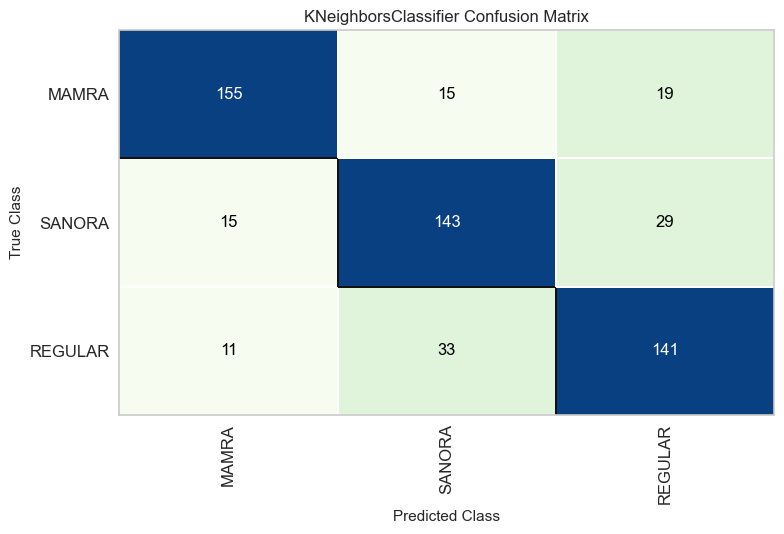

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [232]:
knn_cm = ConfusionMatrix(knn_classifier, classes=classes, cmap='GnBu')

knn_cm.fit(x_train, y_train)
knn_cm.score(x_test, y_test)
knn_cm.show()

# Support Vector Machine (SVM)

In [233]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=0, probability=True)

In [234]:
svc.fit(x_train, y_train)

SVC(probability=True, random_state=0)

In [235]:
pred_svc = svc.predict(x_test)

In [237]:
from sklearn import metrics

# Accuracy
print("Training Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, pred_svc)))


Training Accuracy: 0.7112


Classification Report

In [238]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

       MAMRA       0.88      0.79      0.83       189
     REGULAR       0.65      0.66      0.65       187
      SANORA       0.63      0.69      0.65       185

    accuracy                           0.71       561
   macro avg       0.72      0.71      0.71       561
weighted avg       0.72      0.71      0.71       561



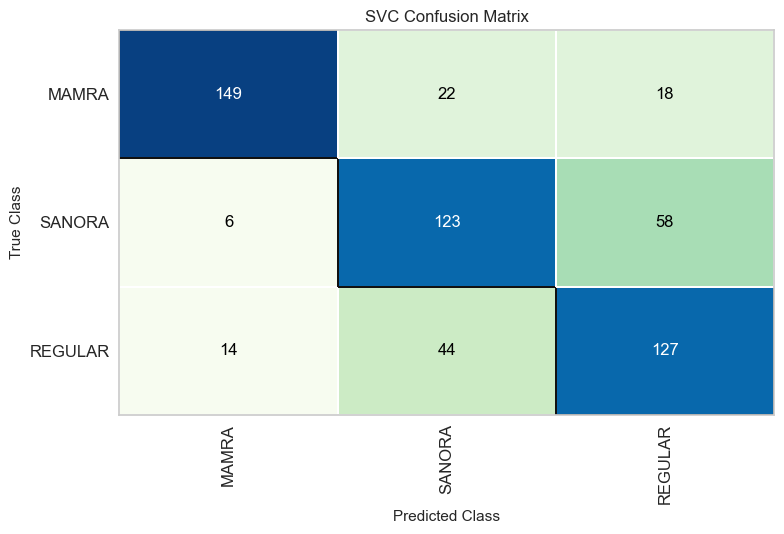

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [239]:
svc_cm = ConfusionMatrix(svc, classes=classes, cmap='GnBu')

svc_cm.fit(x_train, y_train)
svc_cm.score(x_test, y_test)
svc_cm.show()

# Accuracy Comparison of Models

C:\Users\muqadasah\AppData\Local\Temp\ipykernel_37980\776594282.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=scores, palette=colors)


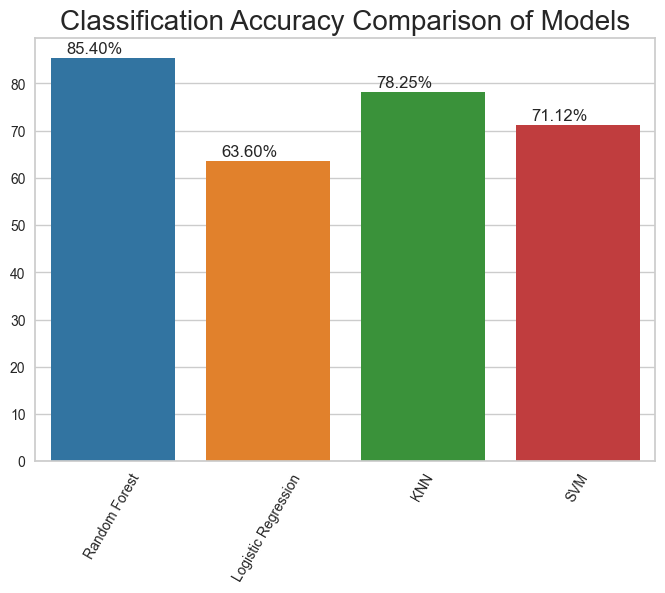

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'Logistic Regression', 'KNN', 'SVM']
scores = [85.4, 63.6, 78.25, 71.12]

# Define custom colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Example colors

# Plot
ax = sns.barplot(x=models, y=scores, palette=colors)
ax.set_title('Classification Accuracy Comparison of Models', fontsize=20)

# Rotate x-axis labels
for item in ax.get_xticklabels():
    item.set_rotation(60)

# Annotate bars with their values
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 1))

plt.show()


# Prediction of the Model (using Random Forest)

In [259]:
input_data = (290.6, 227.94, 127.75, 22619.0, 643.81, 0.47, 0.97, 1.45, 1.75, 0.813, 0.681, 2327.5)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = r_forest.predict(input_data_reshaped)
print(prediction1)


['MAMRA']


In [288]:
input_data = (209.3362885,123.1979141,137.7715912,19677.5,576.6589417,0.571730025,0.975872843,1.344801783,1.699186954,0.808485018,0.745359848,20164)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction3 = r_forest.predict(input_data_reshaped)
print(f"The type of Almond is : {prediction3}")


The type of Almond is : ['MAMRA']


# Boosting Algorithms

In [268]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, RandomForestClassifier, VotingClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

# Cat Boost

In [271]:
cb_imputer = CatBoostClassifier()
cb_imputer.fit(x_train, y_train)
        
y_pred = cb_imputer.predict(x_test)
        

Learning rate set to 0.082453
0:	learn: 1.0632059	total: 186ms	remaining: 3m 6s
1:	learn: 1.0375232	total: 192ms	remaining: 1m 35s
2:	learn: 1.0115953	total: 198ms	remaining: 1m 5s
3:	learn: 0.9880112	total: 206ms	remaining: 51.3s
4:	learn: 0.9665424	total: 213ms	remaining: 42.5s
5:	learn: 0.9508418	total: 222ms	remaining: 36.8s
6:	learn: 0.9320713	total: 228ms	remaining: 32.3s
7:	learn: 0.9177872	total: 236ms	remaining: 29.3s
8:	learn: 0.9031415	total: 242ms	remaining: 26.7s
9:	learn: 0.8902815	total: 251ms	remaining: 24.9s
10:	learn: 0.8779997	total: 257ms	remaining: 23.1s
11:	learn: 0.8656691	total: 264ms	remaining: 21.7s
12:	learn: 0.8555709	total: 272ms	remaining: 20.6s
13:	learn: 0.8451942	total: 278ms	remaining: 19.6s
14:	learn: 0.8365177	total: 287ms	remaining: 18.8s
15:	learn: 0.8281699	total: 293ms	remaining: 18s
16:	learn: 0.8184733	total: 300ms	remaining: 17.4s
17:	learn: 0.8079180	total: 306ms	remaining: 16.7s
18:	learn: 0.8007462	total: 313ms	remaining: 16.1s
19:	learn: 0

In [272]:
# Accuracy
print("Training Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, pred_svc)))


Training Accuracy: 0.7112


# XGB Classifier

In [280]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform y_train
y_train_encoded = le.fit_transform(y_train)

# Transform y_test using the same encoder
y_test_encoded = le.transform(y_test)


In [281]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [282]:
xgb_pred_encoded = xgb.predict(x_test)
xgb_pred = le.inverse_transform(xgb_pred_encoded)

In [283]:
# Accuracy
print("Training Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test_encoded, xgb_pred_encoded)))


Training Accuracy: 0.8449
